# ClubHouse Individual Pitcher Effectiveness Analysis

### Goal: Identify Effective Pitches for Individual Pitchers Based on Team Philosophy

# Contents

1. Define the Strikezone
2. Define Random Hitters (Use real hitter data infuture iteration)
3. Define pitch efficiency based on Hitter data, strikezone and team philosophy
4. Break Dataset into pitch types and use linear regression model to predict when a pitch will be effective given certain inputs.
5. Determine average pitch efficiencies for each pitch type
6. Determine location based pitch efficiencies for each pitch type
7. Goals for future iterations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_path = (r"C:\Users\abalt\Documents\Fall 2018\IEOR 135\Random Pitcher 1.csv")
data1 = pd.read_csv(file_path)
data1

,Speed,Spin,Spin_eff,Spin Axis,VB,HB,StrikeX,StrikeY,Strike,Pitch
0,84.5,1828,1,0,7.7,-1.7,-24.7,53.1,False,FB
1,85.6,1782,1,0,2.9,-2.0,18.8,30.3,False,FB
2,86.0,1889,1,0,9.4,-1.4,1.6,17.0,True,FB
3,85.9,1809,1,0,8.8,1.0,18.7,23.0,False,FB
4,85.0,1743,1,0,3.1,1.1,5.2,45.8,False,FB
5,86.7,1731,1,0,9.1,-0.6,22.5,42.4,False,FB
6,84.9,1740,1,0,8.1,1.3,0.8,44.8,True,FB
7,86.7,1798,1,0,9.5,3.3,6.8,40.4,True,FB
8,84.8,1805,1,0,2.7,-1.1,-8.4,20.0,True,FB
9,84.2,1813,1,0,7.0,4.0,-24.9,52.6,False,FB


### Define Locations

In [3]:
# The Strike Zone
def strikezone(StrikeY, StrikeX):
    if StrikeY >= 16 and StrikeY <= 45 and StrikeX >= -8.5 and StrikeX <= 8.5:
        Pitch = 'Strike'
    else:
        Pitch = 'Ball'
    return Pitch

In [4]:
# Vertical Location
def vert_loc(StrikeY):
    if StrikeY <= 10:
        SY = "Very Low" 
    if StrikeY > 10 and StrikeY <= 24:
        SY = "Low"
    if StrikeY >24 and StrikeY <= 36:
        SY = "Middle"
    if StrikeY > 36 and StrikeY <= 50:
        SY ="Up"
    if StrikeY > 50:
        SY = "Very High"
    return SY

In [5]:
#Horizontal Location
def hor_loc(StrikeX):
    if StrikeX <= -10:
        SX = "Very Outside"
    if StrikeX > -10 and StrikeX <= -5:
        SX = "Outside"
    if StrikeX >-5 and StrikeX <= 5:
        SX = "Middle"
    if StrikeX > 5 and StrikeX <= 10:
        SX = "In"
    if StrikeX > 10:
        SX = "Very Inside"
    return SX

In [6]:
hor_loc(0)

'Middle'

In [7]:
#Pitch Location Callout
def loc_call(StrikeY, StrikeX):
    hl = hor_loc(StrikeX)
    vl = vert_loc(StrikeY)
    sz = strikezone(StrikeY, StrikeX)
    print('The pitch is a', sz)
    print('The pitch is', vl, 'and', hl)


In [8]:
loc_call(20, 10)

The pitch is a Ball
The pitch is Low and In


In [9]:
loc_call(46, 50)

The pitch is a Ball
The pitch is Up and Very Inside


### Define Random Hitter


Once there is better information regarding Hitter Tendencies, This data can be switched out based on individual hitter data <br />
For this simulation, the random hitter will:
1. swing at a ball in the strike zone on 50% of strikes <br />
2. swing at a ball out of the strike zone on 15% of balls <br />
3. get a solid hit on 45% of swings <br />


In [10]:
def rand_hitter(StrikeY, StrikeX):
    SKZ = strikezone(StrikeY, StrikeX)
    if SKZ == 'Strike':
        swing = np.random.binomial(size=1, n=1, p= 0.5)
    else:
        swing = np.random.binomial(size=1, n=1, p= 0.15)
        
    if swing == [1]:
        hit = np.random.binomial(size=1, n=1, p= 0.45)
        if hit == [1]:
            return [1, 1]
        else:
            return [1, 0]
    elif swing == [0]:
        return [0, 0]
    #Uncomment out following line for Bullpen Testing
    #Bullpen_Outcome = [0, 0]
    #return Outcome
    
    

In [11]:
rand_hitter(20, 0)

[0, 0]

### Define Philosophy

The Philosophy for this example is:

We want our pitchers to throw Fastballs either *__Up__* or *__Low__* in or near the Zone, but never in the middle. <br />
We want our pitchers to keep offspeed pitches *__Down and Outside__*. <br />

With 0 Balls and 2 stikes, We want our pichers to throw their best pitch in their most effective spot 



### Define Effective Pitches

Pitches are effective if they:
1. Induce a swing and miss (Future Iteration using game data)
2. Are a called strike
3. Induce a foul ball (Future Iteration using game data)
4. Follow the team Philosophy

In [12]:
def eff_pitch(Pitch, StrikeY, StrikeX, pitcherID = 0, hitter = 'random', balls = 0, strikes = 0):
    effectiveness = False
    vloc = vert_loc(StrikeY)
    hloc = hor_loc(StrikeX)
    rand_hit_data = rand_hitter(StrikeY, StrikeX)
    
    #hitter data
    def rand_hitter_effectiveness():
       
        if rand_hit_data == [1, 1]: # Swing and solid hit
            return False
        else:  
            return True
        
   
    #team philosophy
    def philosophy():
        if Pitch == 'FB':
            if vloc =='Up' or vloc == 'Low':
                return True

        if Pitch != 'FB':
            if vloc == 'Low' or hloc == 'Outside':
                return True
        return False
    

    H = rand_hitter_effectiveness()
    P = philosophy()
    #print(H)
    #print(P)
    if H == True  and P == True:
        effectiveness = True
    elif H == False or P == False:
        effectiveness = False

    return effectiveness
    
    


In [13]:
eff_pitch('FB', 20, 0)

True

In [14]:
loc_call(45, 0)

The pitch is a Strike
The pitch is Up and Middle


In [15]:
data1['Effectiveness'] = data1.apply(lambda row: eff_pitch(row['Pitch'], row['StrikeY'], row['StrikeX']), axis=1)



In [16]:
data1.head()

,Speed,Spin,Spin_eff,Spin Axis,VB,HB,StrikeX,StrikeY,Strike,Pitch,Effectiveness
0,84.5,1828,1,0,7.7,-1.7,-24.7,53.1,False,FB,False
1,85.6,1782,1,0,2.9,-2.0,18.8,30.3,False,FB,False
2,86.0,1889,1,0,9.4,-1.4,1.6,17.0,True,FB,True
3,85.9,1809,1,0,8.8,1.0,18.7,23.0,False,FB,True
4,85.0,1743,1,0,3.1,1.1,5.2,45.8,False,FB,True


In [17]:
#Individual Pitch Data

FB_data = data1.loc[data1['Pitch'] == 'FB']
CB_data = data1.loc[data1['Pitch'] == 'CB']
SL_data = data1.loc[data1['Pitch'] == 'SL']
CH_data = data1.loc[data1['Pitch'] == 'CH']
CB_data.head()

# List of Pitch Data DataFrames

All_Data = [FB_data, CB_data, SL_data, CH_data]
data_names = ["FB_data", "CB_data", "SL_data", "CH_data"]

# Machine Learning Algorithm

We will create a linear regression model which will take Speed, Spin, Spin Efficiency, Spin Axis, Vertical Break, Horizontal Break and Pitch Type to predict Effectiveness

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [19]:
pitch_map= {'FB': 1, 'CB': 2, 'CH': 3, 'SL': 4}

d2 = data1.replace({'Pitch': pitch_map})
d2

,Speed,Spin,Spin_eff,Spin Axis,VB,HB,StrikeX,StrikeY,Strike,Pitch,Effectiveness
0,84.5,1828,1,0,7.7,-1.7,-24.7,53.1,False,1,False
1,85.6,1782,1,0,2.9,-2.0,18.8,30.3,False,1,False
2,86.0,1889,1,0,9.4,-1.4,1.6,17.0,True,1,True
3,85.9,1809,1,0,8.8,1.0,18.7,23.0,False,1,True
4,85.0,1743,1,0,3.1,1.1,5.2,45.8,False,1,True
5,86.7,1731,1,0,9.1,-0.6,22.5,42.4,False,1,True
6,84.9,1740,1,0,8.1,1.3,0.8,44.8,True,1,True
7,86.7,1798,1,0,9.5,3.3,6.8,40.4,True,1,True
8,84.8,1805,1,0,2.7,-1.1,-8.4,20.0,True,1,True
9,84.2,1813,1,0,7.0,4.0,-24.9,52.6,False,1,False


In [20]:
#create new dataframe with input variables

input_df = d2.drop(['Effectiveness', 'Strike'], axis = 1)
input_df

,Speed,Spin,Spin_eff,Spin Axis,VB,HB,StrikeX,StrikeY,Pitch
0,84.5,1828,1,0,7.7,-1.7,-24.7,53.1,1
1,85.6,1782,1,0,2.9,-2.0,18.8,30.3,1
2,86.0,1889,1,0,9.4,-1.4,1.6,17.0,1
3,85.9,1809,1,0,8.8,1.0,18.7,23.0,1
4,85.0,1743,1,0,3.1,1.1,5.2,45.8,1
5,86.7,1731,1,0,9.1,-0.6,22.5,42.4,1
6,84.9,1740,1,0,8.1,1.3,0.8,44.8,1
7,86.7,1798,1,0,9.5,3.3,6.8,40.4,1
8,84.8,1805,1,0,2.7,-1.1,-8.4,20.0,1
9,84.2,1813,1,0,7.0,4.0,-24.9,52.6,1


In [21]:
#Individual Pitch Data

FB_data = d2.loc[d2['Pitch'] == 1]
CB_data = d2.loc[d2['Pitch'] == 2]
SL_data = d2.loc[d2['Pitch'] == 3]
CH_data = d2.loc[d2['Pitch'] == 4]
CB_data.head()

,Speed,Spin,Spin_eff,Spin Axis,VB,HB,StrikeX,StrikeY,Strike,Pitch,Effectiveness
499,70.0,2151,1,0,9.5,9.6,-13.0,33.1,True,2,False
500,73.8,2171,1,0,9.7,5.9,-20.6,10.9,False,2,True
501,71.4,2249,1,0,5.2,9.3,12.4,46.3,False,2,False
502,73.0,2259,1,0,6.1,7.6,-4.6,49.6,False,2,False
503,70.4,2299,1,0,12.4,9.8,-1.8,44.7,True,2,False


In [22]:
#Input DataFrames for Each Pitch

FB_Input = FB_data.drop(['Effectiveness', 'Strike'], axis = 1)
CB_Input = CB_data.drop(['Effectiveness', 'Strike'], axis = 1)
SL_Input = SL_data.drop(['Effectiveness', 'Strike'], axis = 1)
CH_Input = CH_data.drop(['Effectiveness', 'Strike'], axis = 1)

In [23]:
X_train, X_test, Eff_train, Eff_test = train_test_split(input_df, d2['Effectiveness'], test_size = .3)

In [24]:
logreg = LogisticRegression()
logreg.fit(X_train, Eff_train)
Eff_pred = logreg.predict(X_test)
acc_logreg = logreg.score(X_test, Eff_test)

In [25]:
acc_logreg

0.7533333333333333

In [26]:
#Training for Each Individual Pitch
FB_train, FB_test, FB_EFF_train, FB_EFF_test = train_test_split(FB_Input, FB_data['Effectiveness'], test_size = .3)
CB_train, CB_test, CB_EFF_train, CB_EFF_test = train_test_split(CB_Input, CB_data['Effectiveness'], test_size = .3)
SL_train, SL_test, SL_EFF_train, SL_EFF_test = train_test_split(SL_Input, SL_data['Effectiveness'], test_size = .3)
CH_train, CH_test, CH_EFF_train, CH_EFF_test = train_test_split(CH_Input, CH_data['Effectiveness'], test_size = .3)

In [27]:
# Models
#Fastball Model
logreg.fit(FB_train, FB_EFF_train)
FB_EFF_pred = logreg.predict(FB_test)
FB_acc_logreg = logreg.score(FB_test, FB_EFF_test)

#Curveball Model
logreg.fit(CB_train, CB_EFF_train)
CB_EFF_pred = logreg.predict(CB_test)
CB_acc_logreg = logreg.score(CB_test, CB_EFF_test)

#Slider Model
logreg.fit(SL_train, SL_EFF_train)
SL_EFF_pred = logreg.predict(SL_test)
SL_acc_logreg = logreg.score(SL_test, SL_EFF_test)

#Changeup Model
logreg.fit(CH_train, CH_EFF_train)
CH_EFF_pred = logreg.predict(CH_test)
CH_acc_logreg = logreg.score(CH_test, CH_EFF_test)

In [28]:
print(FB_acc_logreg,
CB_acc_logreg,
SL_acc_logreg,
CH_acc_logreg)

0.52 0.8533333333333334 0.84 0.88


# Effectiveness Predictor

In [29]:
def eff_pred(Speed, Spin, Spin_Eff, Spin_Axis, VB, HB, StrikeX, StrikeY, Pitch):
    d = {'Speed': Speed, 'Spin': Spin, 'Spin_Eff': Spin_Eff, 'Spin Axis': Spin_Axis, 'VB': VB, 'HB': HB, 'StrikeX': StrikeX, 'StrikeY': StrikeY, 'Pitch': Pitch}
    test_df = pd.DataFrame(data = d, index = [0])
    x = logreg.predict(test_df)
    return x[0]

In [30]:
eff_pred(86, 2000, 1, 0, -9.4, 1.4, 1, 17, 1)

False

## Averages


### Total

In [31]:
def averages(Pitch_data):
    return Pitch_data.mean(axis = 0)

In [32]:
averages(FB_data)

Speed              85.763855
Spin             1796.465863
Spin_eff            1.000000
Spin Axis           0.000000
VB                  6.102410
HB                  0.011647
StrikeX             0.998394
StrikeY            32.481928
Strike              0.445783
Pitch               1.000000
Effectiveness       0.546185
dtype: float64

In [33]:
averages(CB_data)

Speed              72.5880
Spin             2148.2600
Spin_eff            1.0000
Spin Axis           0.0000
VB                  9.7756
HB                  7.5428
StrikeX             0.0724
StrikeY            33.8920
Strike              0.4600
Pitch               2.0000
Effectiveness       0.2680
dtype: float64

In [34]:
averages(SL_data)

Speed              77.3784
Spin             1523.0880
Spin_eff            1.0000
Spin Axis           0.0000
VB                 12.8956
HB                  2.7504
StrikeX            -0.4520
StrikeY            32.0180
Strike              0.4840
Pitch               3.0000
Effectiveness       0.3200
dtype: float64

In [35]:
averages(CH_data)

Speed              74.8936
Spin             2244.0160
Spin_eff            1.0000
Spin Axis           0.0000
VB                  7.5184
HB                 13.0200
StrikeX             0.5012
StrikeY            30.2992
Strike              0.4800
Pitch               4.0000
Effectiveness       0.3760
dtype: float64

In [36]:
averages(data1)[9]


0.37737737737737737

In [37]:
listy = []
for pitch in All_Data:
    eff = (averages(pitch)[9]*100)
    eff = "%.2f%%" % (eff)
    listy.append(eff)
pitches = pd.DataFrame(data = listy, index = data_names, columns = ['Pitch Efficiencies'])
    
pitches

,Pitch Efficiencies
FB_data,54.62%
CB_data,26.80%
SL_data,37.60%
CH_data,32.00%


### Effective Pitches

In [38]:
data1['Hor_loc'] = data1.apply(lambda row: hor_loc(row['StrikeX']), axis=1)
data1['Vert_loc'] = data1.apply(lambda row: vert_loc(row['StrikeY']), axis=1)

Hor_loc_map = {'Very Outside': 0, 'Outside': 1, 'Middle': 2, 'In': 3, 'Very Inside': 4}
Vert_loc_map = {'Very Low': 0, 'Low' : 1, 'Middle': 2, 'Up': 3, 'Very High': 4}

new_data = data1.replace({'Pitch': pitch_map, 'Hor_loc': Hor_loc_map, 'Vert_loc': Vert_loc_map})
new_data

,Speed,Spin,Spin_eff,Spin Axis,VB,HB,StrikeX,StrikeY,Strike,Pitch,Effectiveness,Hor_loc,Vert_loc
0,84.5,1828,1,0,7.7,-1.7,-24.7,53.1,False,1,False,0,4
1,85.6,1782,1,0,2.9,-2.0,18.8,30.3,False,1,False,4,2
2,86.0,1889,1,0,9.4,-1.4,1.6,17.0,True,1,True,2,1
3,85.9,1809,1,0,8.8,1.0,18.7,23.0,False,1,True,4,1
4,85.0,1743,1,0,3.1,1.1,5.2,45.8,False,1,True,3,3
5,86.7,1731,1,0,9.1,-0.6,22.5,42.4,False,1,True,4,3
6,84.9,1740,1,0,8.1,1.3,0.8,44.8,True,1,True,2,3
7,86.7,1798,1,0,9.5,3.3,6.8,40.4,True,1,True,3,3
8,84.8,1805,1,0,2.7,-1.1,-8.4,20.0,True,1,True,1,1
9,84.2,1813,1,0,7.0,4.0,-24.9,52.6,False,1,False,0,4


In [39]:
# Get Average Effectiveness for each pitch and location
P_type = [1,2,3,4]
Hloc = [0,1,2,3,4]
Vloc = [0,1,2,3,4]
eff_df = pd.DataFrame(columns = ['Avg Effectiveness', 'Pitch_type', 'Vert Loc', 'Hor Loc'])
for pitches in P_type:
    datafr1 = new_data.loc[new_data['Pitch'] == pitches]
    for Y in Vloc:
        datafr2 = datafr1.loc[datafr1['Vert_loc'] == Y]
        for X in Hloc:
            datafr3 = datafr2.loc[datafr2['Hor_loc'] == X]
            listy = [datafr3.mean(axis = 1), pitches, Y, X]
            datafr4 = datafr3['Effectiveness']
            trues = datafr4.loc[datafr4 == True]

            loc_eff = len(trues.index) / max(len(datafr4.index), 1)

            listy = {'Avg Effectiveness': loc_eff, 'Pitch_type': pitches, 'Vert Loc': Y, 'Hor Loc': X}
            listydf = pd.DataFrame(data = listy, index = [0])
            eff_df = eff_df.append(listydf, ignore_index = True)

eff_df

,Avg Effectiveness,Hor Loc,Pitch_type,Vert Loc
0,0.000000,0,1,0
1,0.000000,1,1,0
2,0.000000,2,1,0
3,0.000000,3,1,0
4,0.000000,4,1,0
5,0.900000,0,1,1
6,1.000000,1,1,1
7,0.875000,2,1,1
8,0.818182,3,1,1
9,1.000000,4,1,1


# Effectiveness Diagrams

In [40]:
Fastballs = eff_df.loc[eff_df['Pitch_type'] == 1]
Curveballs = eff_df.loc[eff_df['Pitch_type'] == 2]
Sliders = eff_df.loc[eff_df['Pitch_type'] == 3]
Changeups = eff_df.loc[eff_df['Pitch_type'] == 4]
import seaborn as sns
Fastballs

,Avg Effectiveness,Hor Loc,Pitch_type,Vert Loc
0,0.000000,0,1,0
1,0.000000,1,1,0
2,0.000000,2,1,0
3,0.000000,3,1,0
4,0.000000,4,1,0
5,0.900000,0,1,1
6,1.000000,1,1,1
7,0.875000,2,1,1
8,0.818182,3,1,1
9,1.000000,4,1,1


Text(0.5,0.98,'Pitcher 1 Location Efficiencies')

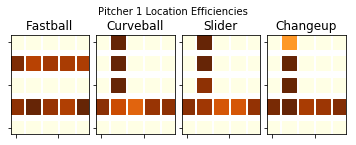

In [41]:
from matplotlib import cm
f = plt.figure()

ax1 = plt.subplot2grid((2,8), (0,0), colspan=2, rowspan = 1)
ax2 = plt.subplot2grid((2,8), (0,2), colspan=2, rowspan = 1) 
ax3 = plt.subplot2grid((2,8), (0,4), colspan=2, rowspan = 1)
ax4 = plt.subplot2grid((2,8), (0,6), colspan=2, rowspan = 1)

for ax in f.axes:
    for t in ax.get_xticklabels()+ax.get_yticklabels():
        t.set_visible(False)
        
ax1.scatter(Fastballs['Hor Loc'], Fastballs['Vert Loc'], s = 200, c= Fastballs['Avg Effectiveness'], cmap = 'YlOrBr', marker = 's')
ax2.scatter(Curveballs['Hor Loc'], Curveballs['Vert Loc'], s = 200, c= Curveballs['Avg Effectiveness'], cmap = 'YlOrBr', marker = 's')
ax3.scatter(Sliders['Hor Loc'], Sliders['Vert Loc'], s = 200, c= Sliders['Avg Effectiveness'], cmap = 'YlOrBr', marker = 's')
ax4.scatter(Changeups['Hor Loc'], Changeups['Vert Loc'], s = 200, c= Changeups['Avg Effectiveness'], cmap = 'YlOrBr', marker = 's')

ax1.set_title('Fastball')
ax2.set_title('Curveball')
ax3.set_title('Slider')
ax4.set_title('Changeup')

f.suptitle('Pitcher 1 Location Efficiencies', fontsize = 10)

From this we can tell where the Pitcher is efficient with each pitch, considering the random batter. The darker the color, the more likely the pitch in that location is to be efficient. White space is considered inneficient. The graphs are meant to model the strikezone based on the Horizontal and Vertical Locations modeled above.

# To Do

### Here are items to do to move this project further ahead:
1. Webscrape Rapsodo for each pitcher into the .csv format used here. With this data we can predict accuracies for each real pitcher.
2. Find real hitter tendency data. Chances are, this will come from the 6-4-3 charts. By understanding what hitters are likely to do in certain situations, we can predict where the pitcher is most likely to find success using the ML model.
3. Implement the machine learning model into the user interface. With this, we can predict which pitches are most likely to be successful.
4. Improve the algorithms to be dynamic considering pitchers with different pitch types
5. Improve the Philosophy function to be dynamic based on balls, strikes, number of outs, runners on base and inning.